In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from  sklearn.model_selection import KFold, train_test_split

In [6]:
data = pd.read_csv('LumositySample_user92098.csv')

In [7]:
def expmodel(params, x):
    # A basic exponential model
    c, a, u = params
    predy = a - (a - u) * np.exp(-c * x)
    return predy

def powermodel(params, x):
    # A basic power model
    c, a, u = params
    predy = a - (a - u) * x ** -c
    return predy

'''def AFDmodel(u, b, h, c, s, d, x):
    n = len(x) # We need the total number of gameplays
    predy = np.zeros(n)
    for i in range(n):
        strength = 0
        for j in range(i-1):
            if s[i] == s[j]:
                t = (i-j)
            else:
                t = (i-j)+(d[i]-d[j])*h
            strength = strength + (t**(-c))
        predy[i] = u + b*np.log(strength+1)
    return predy
'''
def calcmse(params, x, y, model):
    '''make sure params list mathches the required parameters for the model
    ex: exp_model has c, a, u, t
    ex: AFD_model has u, b, h, c, s, d, g'''
    # predicted scores
    if model == 'AFDmodel':
        predy = model(params, session, day, x)
    else:
        predy = model(params, x)
    mse = np.mean((predy - y)**2)
    return mse

def cross_validation(data, params, model):
    kf = KFold(n_splits=10, shuffle=True)
    x=data.columns[0]
    y=data.columns[1]
    mse = []
    for train_index, validation_index in kf.split(data):
        train, validation = data.iloc[train_index,:], data.iloc[validation_index]
        result = minimize(calcmse, params, args=(train[x], train[y], model), bounds=[(0, None), (0, None), (0, None)])
        p = result.x
        mse_v = calcmse(p, validation[x], validation[y], model)
        mse.append(mse_v)
    avg_mse = np.mean(mse)
    return avg_mse, p


In [8]:
# plan

# split data between test and train
# start with the first model
# create starting params
# cross validate with model
# output: MSE 
# graph data to see if it lines up okay

# repeat with other models

In [9]:
x = data.gameplay
y = data.score
s = data.session        # for AFD
d = data.dayselapsed    # for AFD

In [10]:
# starting parameter values for exponential model and power model
p0 = np.zeros(3)
p0[0] = 0.5
p0[1] = 100
p0[2] = 50

In [11]:
exp = cross_validation(data, p0, expmodel)
parameter_exp = exp[1]
y_exp = expmodel(parameter_exp,x)

In [12]:
pwr = cross_validation(data, p0, powermodel)
parameter_pwr = pwr[1]
y_pwr = powermodel(parameter_pwr,x)

In [13]:
print('power model MSE:',pwr[0],'\nexponential model MSE:',exp[0])

power model MSE: 11.529197468639016 
exponential model MSE: 7.896317104869539


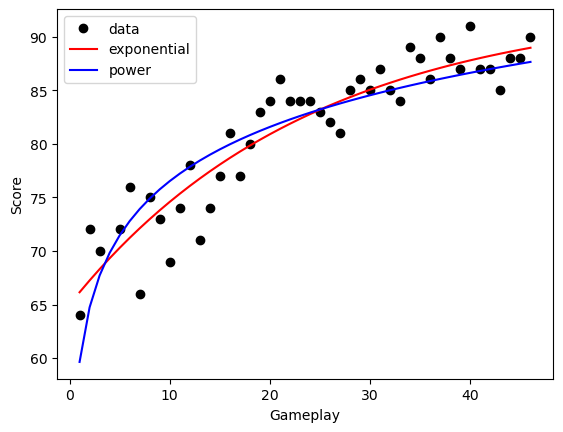

In [14]:
labels = ['data','exponential','power']

plt.plot(x, y, 'ko')
plt.plot(x,y_exp,'r-')
plt.plot(x,y_pwr,'b-')
plt.legend(labels)
plt.xlabel('Gameplay')
plt.ylabel('Score')
plt.show()